<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Unsupervised_Learning_Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept

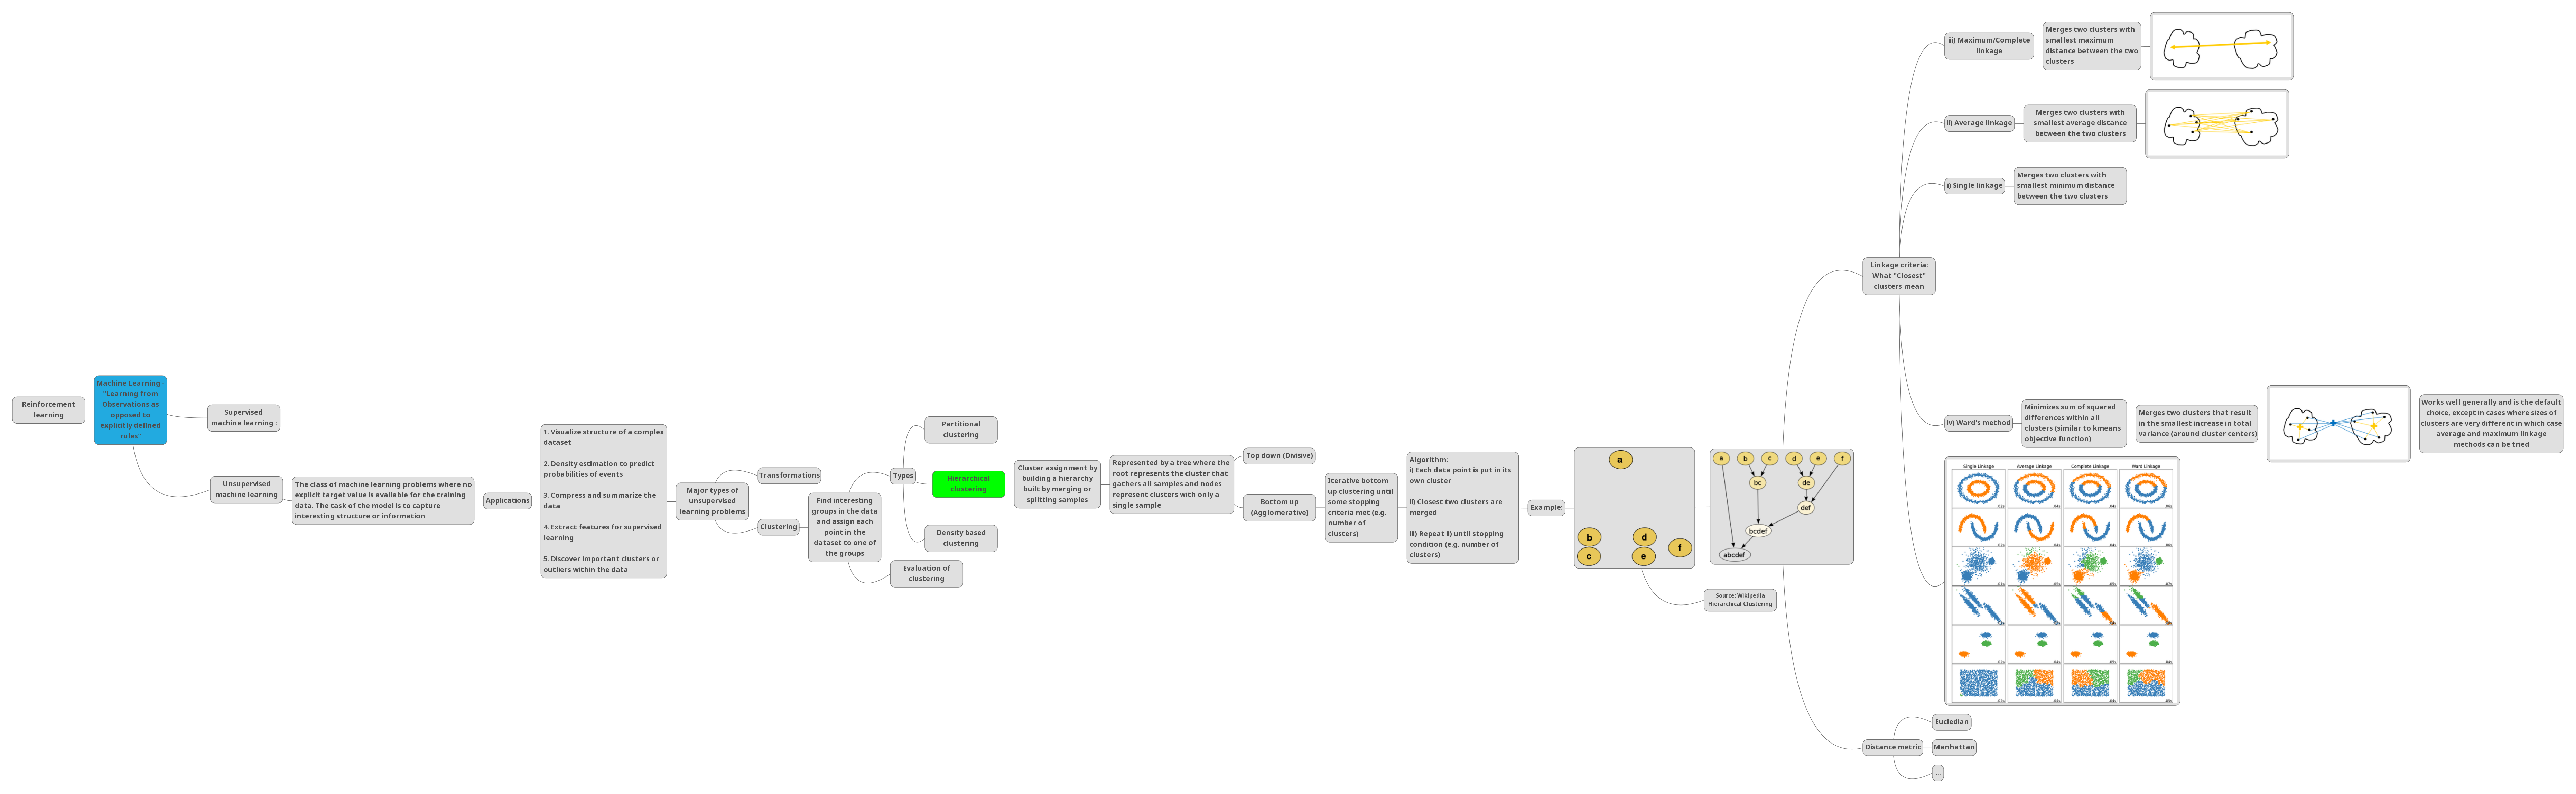

# Setup

In [47]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from statistics import mode

# Case studies

# Agglomerative clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering

## Blobs

In [46]:
X_synth,y_synth = make_blobs(
           random_state=10)

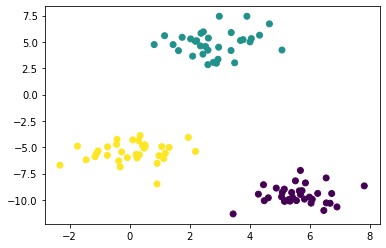

In [37]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)

In [38]:
aggcls = AgglomerativeClustering(n_clusters=3)

In [39]:
cls_pred = aggcls.fit_predict(X_synth)

Text(0.5, 1.0, 'Agglomerative clustering on synthetic dataset')

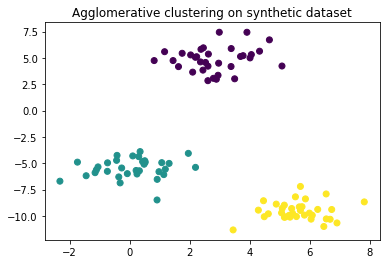

In [40]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=cls_pred)
plt.title('Agglomerative clustering on synthetic dataset')

### Dendrogram

In [11]:
from scipy.cluster.hierarchy import ward,dendrogram,linkage

In [41]:
X_synth,y_synth = make_blobs(random_state=10,n_samples=10)

In [42]:
X_synth

array([[  5.69192445,  -9.47641249],
       [  1.70789903,   6.00435173],
       [  0.23621041,  -3.11909976],
       [  2.90159483,   5.42121526],
       [  5.85943906,  -8.38192364],
       [  6.04774884, -10.30504657],
       [ -2.00758803,  -7.24743939],
       [  1.45467725,  -6.58387198],
       [  1.53636249,   5.11121453],
       [  5.4307043 ,  -9.75956122]])

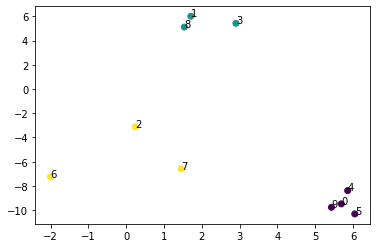

In [43]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)

for i,data in enumerate(X_synth):
  plt.annotate(i,data)

Text(0.5, 1.0, "Ward's method")

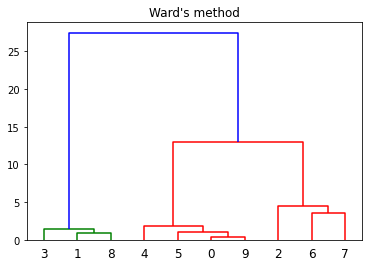

In [44]:
plt.figure()
# dendrogram(ward(X_synth))
# plt.title('Ward\'s method')

## method2
linked = linkage(X_synth, 'ward') #'single','average','ward','complete',
dendrogram(linked)
plt.title('Ward\'s method')

In [45]:
linked

array([[ 0.        ,  9.        ,  0.38523912,  2.        ],
       [ 1.        ,  8.        ,  0.90946074,  2.        ],
       [ 5.        , 10.        ,  0.97205593,  3.        ],
       [ 3.        , 11.        ,  1.48579007,  3.        ],
       [ 4.        , 12.        ,  1.8020651 ,  4.        ],
       [ 6.        ,  7.        ,  3.5252805 ,  2.        ],
       [ 2.        , 15.        ,  4.42367315,  3.        ],
       [14.        , 16.        , 12.96789481,  7.        ],
       [13.        , 17.        , 27.4716294 , 10.        ]])

* All seem ok, except why 6 & 7 are merged before 2 & 7, as 2 & 7 are much closer than 6 & 7. (TODO)

## Effect of different linkages on toy datasets

### Circles

In [48]:
X_circles,y_circles = make_circles(n_samples = 800,
                                   noise = 0.1,
                                   factor = 0.3)

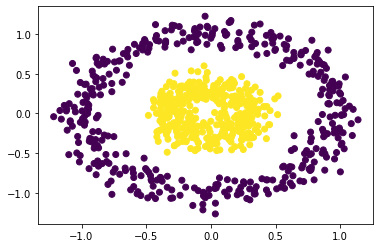

In [52]:
plt.scatter(X_circles[:,0],X_circles[:,1],c=y_circles)


In [76]:
def plot_cluster(datatoplot,clusteringlabel,plottitle):
  plt.scatter(datatoplot[:,0],datatoplot[:,1],c=clusteringlabel)
  plt.title(plottitle)

def different_linkages(data,algoparams):
  default_base = {'n_clusters': 2}
  params = default_base.copy()
  params.update(algoparams)

  minlinkage = AgglomerativeClustering(linkage = 'single',n_clusters=params['n_clusters'])
  minlinkage = minlinkage.fit_predict(data)

  avglinkage = AgglomerativeClustering(linkage = 'average',n_clusters=params['n_clusters'])
  avglinkage = avglinkage.fit_predict(data)

  maxlinkage = AgglomerativeClustering(linkage = 'complete',n_clusters=params['n_clusters'])
  maxlinkage = maxlinkage.fit_predict(data)

  wardlinkage = AgglomerativeClustering(linkage = 'ward',n_clusters=params['n_clusters'])
  wardlinkage = wardlinkage.fit_predict(data)

  plt.figure(figsize = (20,5))
  plt.subplot(1,4,1)
  plot_cluster(data,minlinkage,'minimum/single linkage')

  plt.subplot(1,4,2)
  plot_cluster(data,avglinkage,'average linkage')

  plt.subplot(1,4,3)
  plot_cluster(data,maxlinkage,'complete linkage')

  plt.subplot(1,4,4)
  plot_cluster(data,wardlinkage,'ward linkage')

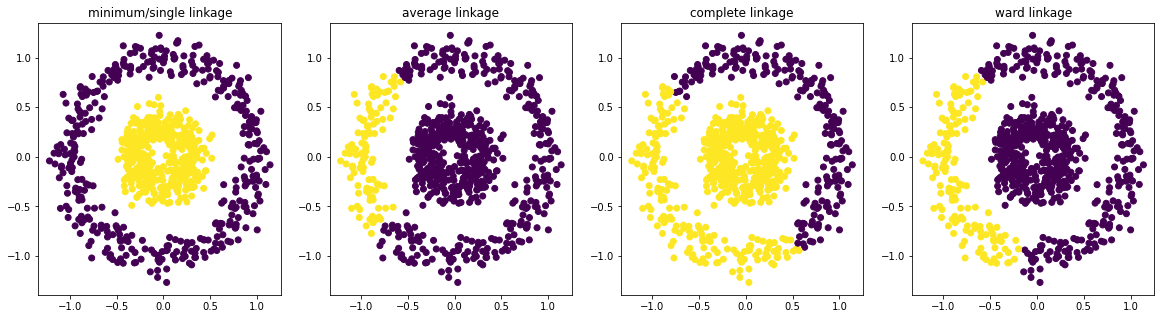

In [77]:
different_linkages(X_circles,{'n_clusters' : 2})

### Moons

In [60]:
X_moons,y_moons = make_moons(n_samples=750,
                             noise = 0.1)

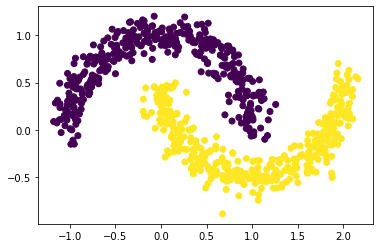

In [61]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)

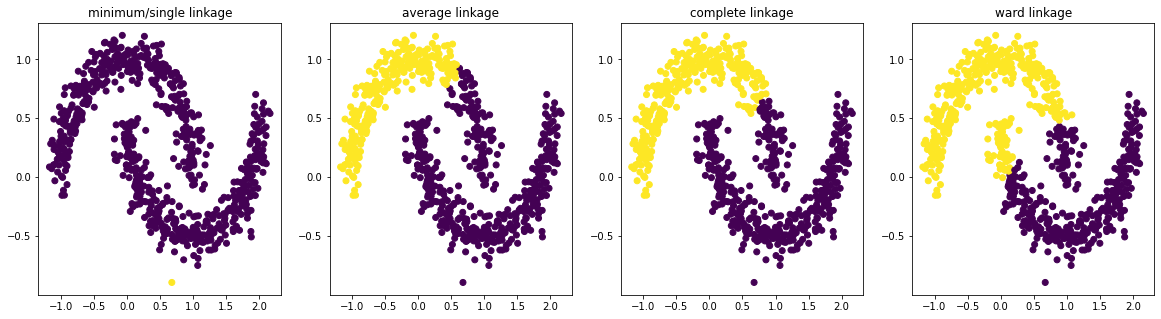

In [78]:
different_linkages(X_moons,{'n_clusters' : 2})

### Blobs with different densities

In [96]:
X_blobs2,y_blobs2 = make_blobs(n_samples=1500,centers = 3,cluster_std = [1,2.5,0.5],random_state=170)

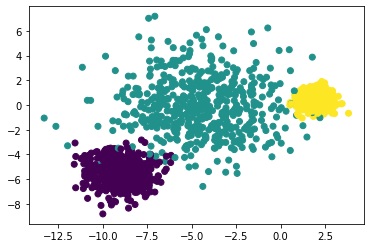

In [97]:
plt.scatter(X_blobs2[:,0],X_blobs2[:,1],c=y_blobs2)

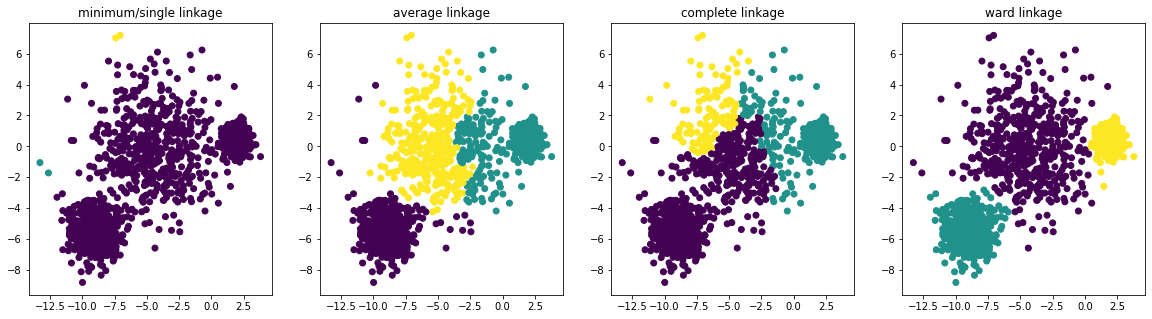

In [98]:
different_linkages(X_blobs2,{'n_clusters' : 3})

Thus ward's method generally works decently in presence of noise. 

## References & further reading:

References:
1. Applied Data Science in Python Course - Coursera

2. StatQuest - Hierarchical Clustering https://www.youtube.com/watch?v=7xHsRkOdVwo





